In [ ]:
import pandas as pd

In [6]:
# Precisei colocar 'r' como prefixo no caminho pra sair caminho normal para Raw string, ou inverter as barras
df = pd.read_csv(r"C:\Users\Alex\Desktop\Aprendizado_de_Maquina\Atividade_01\Iris\iris_data", sep=",", header=None)
df.columns = ["sepal_length","sepal_width","petal_length","petal_width","class"]

In [7]:
df.head(n=5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.hist(bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000221931B34E0>,
      dtype=object)

In [9]:
from sklearn import preprocessing
import numpy as np

In [10]:
df_numeric = df[['sepal_length','sepal_width','petal_length','petal_width']]
#X_array = np.array(df_numeric)

In [11]:
Scaler = preprocessing.StandardScaler()

In [12]:
array_scaler = Scaler.fit_transform(df_numeric)

In [13]:
Data_Scaler = pd.DataFrame(array_scaler, columns=['var1','var2','var3','var4'])

In [14]:
Data_Scaler.head(n=10)

,var1,var2,var3,var4
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
5,-0.537178,1.957669,-1.170675,-1.050031
6,-1.506521,0.800654,-1.341272,-1.181504
7,-1.021849,0.800654,-1.284407,-1.312977
8,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.143017,0.106445,-1.284407,-1.444450


In [15]:
#Join_df = pd.merge(left=Data_Scaler,right=df, on = index)
Base_final = df.join(Data_Scaler).iloc[:,4:]#.head(n=10)

In [16]:
X = Base_final.iloc[:,1:5]
y = Base_final.iloc[:,0]

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
Log_reg = LogisticRegression(multi_class='multinomial', solver = 'newton-cg')

In [30]:
Log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = Log_reg.predict(X_test)

In [40]:
y_pred_prob = Log_reg.predict_proba(X_test)

In [46]:
log_loss(y_test,y_pred_prob)

0.1362942226045565

In [ ]:
round(Log_reg.score(X_test,y_test), 3)

In [49]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test,y_pred)

In [50]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


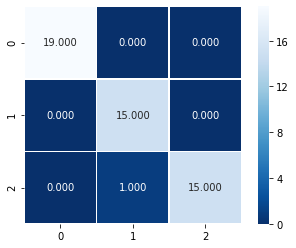

In [52]:
sns.heatmap(CM, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');